In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.tree import *

In [ ]:
from IPython.display import display


In [ ]:
pos_train=pd.read_csv('/content/train_Arabic_tweets_positive_20190413.tsv',sep='\t',header=None)
neg_train=pd.read_csv('/content/train_Arabic_tweets_negative_20190413.tsv.zip',sep='\t',header=None)
train_data=pd.concat([pos_train,neg_train],ignore_index=True)
train_data.columns=['label','tweet']
del pos_train,neg_train

In [ ]:
train_data.head()


,label,tweet
0,pos,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
1,pos,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
2,pos,من الخير نفسه 💛
3,pos,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
4,pos,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...


In [ ]:
train_data


,label,tweet
0,pos,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
1,pos,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
2,pos,من الخير نفسه 💛
3,pos,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
4,pos,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...
...,...,...
45270,neg,كيف ترى أورانوس لو كان يقع مكان القمر ؟ 💙💙 كوك...
45271,neg,احسدك على الايم 💔
45272,neg,لأول مرة ما بنكون سوا 💔
45273,neg,بقله ليش يا واطي 🤔


In [ ]:
train_data.tail()


,label,tweet
45270,neg,كيف ترى أورانوس لو كان يقع مكان القمر ؟ 💙💙 كوك...
45271,neg,احسدك على الايم 💔
45272,neg,لأول مرة ما بنكون سوا 💔
45273,neg,بقله ليش يا واطي 🤔
45274,neg,قد طال صبري في النوى إذ تركتني كئيبا ؛ غريبا ب...


In [ ]:
train_data.shape


(45275, 2)

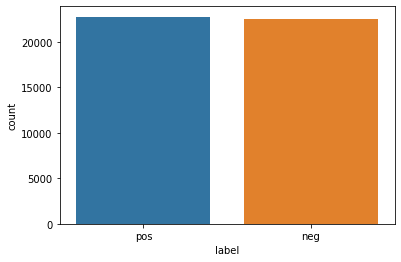

In [ ]:
sns.countplot(data=train_data,x='label')


In [ ]:
#reading test dataset
test_pos=pd.read_csv("/content/test_Arabic_tweets_positive_20190413.tsv",sep='\t',header=None)
test_neg=pd.read_csv("/content/test_Arabic_tweets_negative_20190413.tsv",sep='\t',header=None)
test_data=pd.concat([test_pos,test_neg],ignore_index=True)
test_data.columns=['label','tweet']
del test_pos,test_neg

In [ ]:
test_data.head()


,label,tweet
0,pos,#الهلال_الاهلي فوز هلالي مهم الحمد لله 💙 زوران...
1,pos,صباحك خيرات ومسرات 🌸
2,pos,#تأمل قال الله ﷻ :- _*​﴿بواد غير ذي زرع ﴾*_ 💫💫...
3,pos,😂😂 يا جدعان الرجاله اللي فوق ال دول خطر ع تويت...
4,pos,رساله صباحيه : 💛 اللهم اسألك التوفيق في جميع ا...


In [ ]:
test_data

,label,tweet
0,pos,#الهلال_الاهلي فوز هلالي مهم الحمد لله 💙 زوران...
1,pos,صباحك خيرات ومسرات 🌸
2,pos,#تأمل قال الله ﷻ :- _*​﴿بواد غير ذي زرع ﴾*_ 💫💫...
3,pos,😂😂 يا جدعان الرجاله اللي فوق ال دول خطر ع تويت...
4,pos,رساله صباحيه : 💛 اللهم اسألك التوفيق في جميع ا...
...,...,...
11515,neg,النوم وانت مكسور ده احساس غبي اللي هو مش قادر ...
11516,neg,استشهاد_الامام_كاظم_الغيظ السلام على المعذب في...
11517,neg,انا كنت اكل الصحن بكبره 😐
11518,neg,قولوا لي ايش تشوفوا .. مع ملاحظة التلطف لأنه ا...


In [ ]:
from sklearn.svm import SVC


In [ ]:
vectorizer=TfidfVectorizer(analyzer='char_wb',ngram_range=(3,5),min_df=0.01,max_df=0.3)


In [ ]:
clf=SVC(kernel='rbf')


In [ ]:
training_data=train_data.copy()
testing_data=test_data.copy()

In [ ]:
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(vectorizer,clf)

In [ ]:
pipe.fit(training_data.tweet,training_data.label)


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='char_wb', max_df=0.3, min_df=0.01,
                                 ngram_range=(3, 5))),
                ('svc', SVC())])

In [ ]:
y_pred=pipe.predict(testing_data.tweet)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve,auc,RocCurveDisplay,classification_report

In [ ]:
accuracy_score(testing_data.label,y_pred)


0.8815972222222223

In [ ]:
print(classification_report(testing_data.label,y_pred))


              precision    recall  f1-score   support

         neg       0.89      0.87      0.88      5768
         pos       0.87      0.89      0.88      5752

    accuracy                           0.88     11520
   macro avg       0.88      0.88      0.88     11520
weighted avg       0.88      0.88      0.88     11520



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf2=RandomForestClassifier()
pipe2=make_pipeline(vectorizer,clf2)
pipe2.fit(training_data.tweet,training_data.label)
pred=pipe2.predict(testing_data.tweet)

In [ ]:
print(classification_report(testing_data.label,pred))


              precision    recall  f1-score   support

         neg       0.89      0.88      0.89      5768
         pos       0.88      0.89      0.89      5752

    accuracy                           0.89     11520
   macro avg       0.89      0.89      0.89     11520
weighted avg       0.89      0.89      0.89     11520



In [ ]:
print('Score:',accuracy_score(testing_data.label,pred))


Score: 0.8866319444444445
